# Theodolite Analysis - Demand Metric

This notebook applies Theodolite's *demand* metric to describe scalability of a SUT based on Theodolite measurement data.

Theodolite's *demand* metric is a function, mapping load intensities to the minimum required resources (e.g., instances) that are required to process this load. With this notebook, the *demand* metric function is approximated by a map of tested load intensities to their minimum required resources.

The final output when running this notebook will be a CSV file, providig this mapping. It can be used to create nice plots of a system's scalability using the `demand-metric-plot.ipynb` notebook.

In the following cell, we need to specifiy:

* `exp_id`: The experiment id  that is to be analyzed.
* `warmup_sec`: The number of seconds which are to be ignored in the beginning of each experiment.
* `max_lag_trend_slope`: The maximum tolerable increase in queued messages per second.
* `measurement_dir`: The directory where the measurement data files are to be found.
* `results_dir`: The directory where the computed demand CSV files are to be stored.

In [1]:
exp_id = 200
warmup_sec = 60
max_lag_trend_slope = 2000
measurement_dir = '<path-to>/measurements'
results_dir = '<path-to>/results'


With the following call, we compute our demand mapping.

In [2]:
from src.demand import demand

demand = demand(exp_id, measurement_dir, max_lag_trend_slope, warmup_sec)

We might already want to plot a simple visualization here:

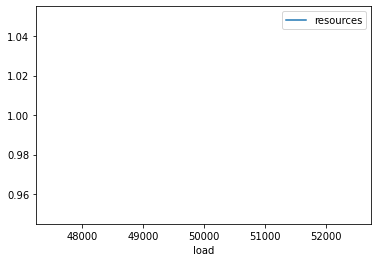

In [3]:
demand.plot(kind='line',x='load',y='resources')

Finally we store the results in a CSV file.

In [4]:
import os

demand.to_csv(os.path.join(results_dir, f'exp{exp_id}_demand.csv'), index=False)